# Introducción a Pytorch

## ¿Qué es PyTorch?

[PyTorch](https://pytorch.org/) es un framework de código abierto para aprendizaje automático y aprendizaje profundo.

## ¿Para qué se puede usar PyTorch?

PyTorch permite manipular y procesar datos y escribir algoritmos de aprendizaje automático utilizando código Python.

## ¿Por qué usar PyTorch?

PyTorch es el [framework de aprendizaje profundo más utilizado en Papers With Code](https://paperswithcode.com/trends), un sitio web para seguir papers en aprendizaje automático y los repositorios de código asociados.

PyTorch también se encarga de muchas cosas, como la aceleración por GPU (haciendo que tu código se ejecute más rápido).




## Importando PyTorch

Nota: Antes de ejecutar cualquier código en este notebook, deberías haber completado los pasos de [configuración de PyTorch](https://pytorch.org/get-started/locally/).
Sin embargo, si estás ejecutando en Google Colab, todo debería funcionar (Google Colab viene con PyTorch y otras bibliotecas ya instaladas).

Comencemos importando PyTorch y verificando la versión que estamos usando.

In [ ]:
import torch
torch.__version__

## Introducción a los tensores

Los tensores son una estructura de datos especializada que representan datos de manera numérica. Se utilizan para codificar los inputs, los outputs y los parámetros de un modelo.

Son similares a los arrays de n dimensiones de NumPy, con la diferencia de que los tensores también pueden utilizarse en una GPU para acelerar los cálculos.

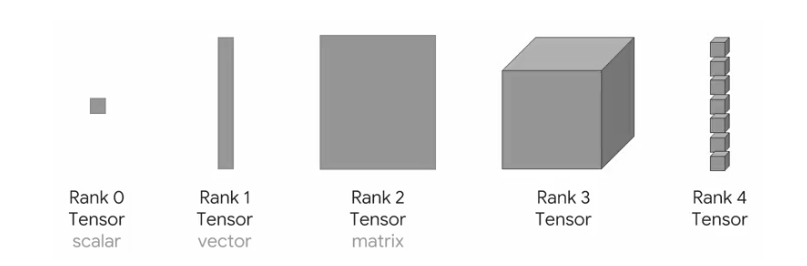



### Creando tensores

Existe una página completa de documentación dedicada a la clase [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html). En este taller veremos **algunas** de las cosas más importantes.

Lo primero que vamos a crear es un **escalar**.

Un escalar es un número único y en el lenguaje de los tensores es un tensor de dimensión cero.



In [ ]:
# Escalar
escalar = torch.tensor(7)
escalar


Podemos chequear las dimensiones del tensor usando el atributo `ndim`.

In [ ]:
escalar.ndim

Bien, ahora veamos un **vector**.

Un vector es un tensor de una sola dimensión pero puede contener muchos números.

Es decir, podrías tener un vector `[3, 2]` para describir `[habitaciones, baños]` en tu casa. O podrías tener `[3, 2, 2]` para describir `[habitaciones, baños, estacionamientos]` en tu casa.

In [ ]:
# Vector
vector = torch.tensor([22, 11])
vector

Cuántas dimensiones creen que tiene?

In [ ]:
vector.ndim

El `vector` contiene dos números pero solo tiene una dimensión.

El número de dimensiones que tiene un tensor en PyTorch contando el número de corchetes en el exterior (`[`) y solo contamos un lado.

¿Cuántos corchetes tiene `vector`?

Otro concepto importante para los tensores es su atributo `shape`. El shape te dice cómo están organizados los elementos dentro de ellos.

Veamos el shape de `vector`.

In [ ]:
vector.shape

Lo anterior devuelve `torch.Size([2])` lo que significa que nuestro vector tiene un shape de `[2]`. Esto es debido a los dos elementos que colocamos dentro de los corchetes (`[22, 11]`).

Ahora veamos una **matriz**.

In [ ]:
MATRIZ = torch.tensor([[7, 8],
                       [9, 10]])
MATRIZ

In [ ]:
MATRIZ.ndim

In [ ]:
MATRIZ.shape

Obtenemos la salida `torch.Size([2, 2])` porque `MATRIZ` tiene dos elementos de profundidad y dos elementos de ancho.

¿Qué tal si creamos un **tensor**?

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

¿Cuántas dimensiones crees que tiene? (pista: usa el truco de contar los corchetes)

In [ ]:
TENSOR.ndim

¿Y qué hay de su shape (forma)?


In [ ]:
TENSOR.shape

### Tensores Randoms

Los modelos de machine learning como las redes neuronales manipulan y buscan patrones dentro de los tensores.

Un modelo de machine learning a menudo comienza con grandes tensores aleatorios de números y ajusta estos números aleatorios mientras trabaja con los datos para representarlos mejor.

En esencia:

`Comenzar con números aleatorios -> mirar datos -> actualizar números aleatorios -> mirar datos -> actualizar números aleatorios...`

Como científico de datos, puedes definir cómo el modelo de machine learning comienza (inicialización), mira los datos (representación) y actualiza (optimización) sus números aleatorios.

Por ahora, veamos cómo crear un tensor de números aleatorios.

Podemos hacerlo usando [`torch.rand()`](https://pytorch.org/docs/stable/generated/torch.rand.html) y pasando el parámetro `size`.

In [ ]:
# Tensor random de tamaño (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

La flexibilidad de `torch.rand()` es que podemos ajustar el `size` a lo que queramos.

Por ejemplo, digamos que queremos un tensor aleatorio en la forma común de imagen de `[224, 224, 3]` (`[altura, ancho, canales_de_color]`).

In [ ]:
# Tensor random de tamaño (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim


### Tensores de ceros y unos

¿Por qué querriamos tensores de ceros y unos? Para enmascarar por ejemplo (como enmascarar algunos de los valores en un tensor con ceros para que un modelo sepa que no debe aprenderlos).

Vamos a crear un tensor lleno de ceros con [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)

De nuevo, el parámetro `size` entra en juego.

In [ ]:
# Tensor de todos ceros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

Podemos hacer lo mismo para crear un tensor de todos unos excepto que usamos [`torch.ones()`](https://pytorch.org/docs/stable/generated/torch.ones.html) en su lugar.

In [ ]:
# Tensor de todos unos
ones = torch.ones(size=(3, 4))
ones, ones.dtype

A veces podríamos querer un tensor de cierto tipo con la misma forma que otro tensor.

Por ejemplo, un tensor de todos ceros con la misma forma que un tensor anterior.

Para hacerlo, podemos usar [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) o [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) que devuelven un tensor lleno de ceros o unos con la misma forma que el `input` respectivamente.

In [ ]:
tensor = torch.tensor([[3, 6, 9],[3, 6, 9]])

# Tensor de ceros con la misma forma que tensor
zeros = torch.zeros_like(input=tensor)
zeros

### Tipos de datos de tensores

Hay muchos [tipos de datos de tensores disponibles en PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Algunos son específicos para CPU y otros son mejores para GPU.

Llegar a saber cuál usar puede tomar algo de tiempo.

Generalmente si ves `torch.cuda` en alguna parte, el tensor está siendo usado para GPU (ya que las GPUs Nvidia usan un kit de herramientas de computación llamado CUDA).

El tipo más común (y generalmente el predeterminado) es `torch.float32` o `torch.float`.

Esto se conoce como "punto flotante de 32 bits".

Pero también existe el punto flotante de 16 bits (`torch.float16` o `torch.half`) y el punto flotante de 64 bits (`torch.float64` o `torch.double`).

Y para confundir aún más las cosas, también hay enteros de 8 bits, 16 bits, 32 bits y 64 bits.

¡Y más!

> **Nota:** Un entero es un número redondo como `7` mientras que un flotante tiene decimal `7.0`.

La razón de todos estos tiene que ver con la **precisión en la computación** (cantidad de detalle utilizada para describir un número).

Cuanto mayor sea el valor de precisión (8, 16, 32), más detalle y, por lo tanto, más datos se utilizan para expresar un número.

Esto importa en el aprendizaje profundo y la computación numérica porque estamos realizando tantas operaciones, que cuanto más detalle tengamos que calcular, más computación tenemos que usar.

Por lo tanto, los tipos de datos de menor precisión generalmente son más rápidos de calcular pero sacrifican algo de rendimiento en métricas de evaluación como la precisión (más rápidos de calcular pero menos precisos).

Veamos cómo crear algunos tensores con tipos de datos específicos. Podemos hacerlo usando el parámetro `dtype`.

In [ ]:
# El tipo de dato por default es float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,
                               device=None,
                               requires_grad=False)

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

Los errores más comunes que nos encontraremos en PyTorch son de tipo de datos y de dispositivo (device).

Por ejemplo, uno de los tensores es `torch.float32` y el otro es `torch.float16` (PyTorch a menudo prefiere que los tensores tengan el mismo formato).

O uno de tus tensores está en la CPU y el otro está en la GPU (PyTorch prefiere que los cálculos entre tensores estén en el mismo dispositivo).

## Obteniendo información de los tensores

En resumen, los tres atributos más comunes que nos van a interesar conocer sobre los tensores son:
* `shape` - ¿qué forma tiene el tensor? (algunas operaciones requieren reglas específicas de forma)
* `dtype` - ¿en qué tipo de datos están almacenados los elementos dentro del tensor?
* `device` - ¿en qué dispositivo está almacenado el tensor? (generalmente GPU o CPU)

In [ ]:
some_tensor = torch.rand(3, 4)

print(some_tensor)
print(f"Shape del tensor: {some_tensor.shape}")
print(f"Tipo de dato: {some_tensor.dtype}")
print(f"Dispositivo: {some_tensor.device}")

## Operaciones con tensores

En el aprendizaje profundo, los datos (imágenes, texto, video, audio, etc.) se representan como tensores.

Un modelo aprende investigando esos tensores y realizando una serie de operaciones en tensores para crear una representación de los patrones en los datos de entrada.

Estas operaciones son a menudo:
* Suma
* Resta
* Multiplicación (elemento por elemento)
* División
* Multiplicación de matrices

### Operaciones básicas

Comencemos con algunas de las operaciones fundamentales, suma (`+`), resta (`-`), multiplicación (`*`).

Funcionan justo como pensarías que lo harían.

In [ ]:
# Sumar 10
tensor = torch.tensor([1, 2, 3])
tensor + 10

In [ ]:
# Multiplicar 10
tensor * 10

Los valores del tensor anterior no terminaron siendo `tensor([110, 120, 130])`, esto es porque los valores dentro del tensor no cambian a menos que sean reasignados.

In [ ]:
tensor

Restemos 10 y reasignemos la variabla `tensor`

In [ ]:
tensor = tensor - 10
tensor

In [ ]:
tensor = tensor + 10
tensor

También podemos multiplicar elemento a elemento con `*` o  `torch.mul()`

In [ ]:
print(tensor, "*", tensor)
print("Resultado:", tensor * tensor)

print(tensor, "torch.mul", tensor)
print("Resultado:", torch.mul(tensor, tensor))

### Multiplicación de matrices

Una de las operaciones más comunes en los algoritmos de machine learning y deep learning (como las redes neuronales) es la [multiplicación de matrices](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implementa la funcionalidad de multiplicación de matrices en el método [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Las dos reglas principales para la multiplicación de matrices que hay que recordar son:

1. Las **dimensiones internas** deben coincidir:
 * `(3, 2) @ (3, 2)` no funcionará
 * `(2, 3) @ (3, 2)` funcionará
 * `(3, 2) @ (2, 3)` funcionará
2. La matriz resultante tiene la forma de las **dimensiones externas**:
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Nota:** "`@`" en Python es el símbolo para la multiplicación de matrices.

> **Más info:** Pueden ver todas las reglas para la multiplicación de matrices usando `torch.matmul()` [en la documentación de PyTorch](https://pytorch.org/docs/stable/generated/torch.matmul.html).


In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

La diferencia entre la multiplicación elemento por elemento y la multiplicación de matrices es la suma de valores.

In [ ]:
# Elemento a elemento
tensor * tensor

In [ ]:
# Multiplicación de matrices
torch.matmul(tensor, tensor)

In [ ]:
# También se puede usar el símbolo @, no es recomendado (es más lento)
tensor @ tensor

#### Uno de los errores más comunes (shape)

Debido a que gran parte del deep learning consiste en multiplicar y realizar operaciones con matrices, y las matrices tienen reglas estrictas sobre qué formas y tamaños se pueden combinar, uno de los errores más comunes que encontrarás en el deep learning son los de shape.

In [ ]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)
tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B)

Podemos hacer que la multiplicación de matrices funcione entre `tensor_A` y `tensor_B` haciendo que sus dimensiones internas coincidan.

Una de las formas de hacer esto es con una **traspuesta** (intercambiar las dimensiones de un tensor dado).

Esto se puede hacer en PyTorch usando:
* `torch.transpose(input, dim0, dim1)` - donde `input` es el tensor que se desea transponer y `dim0` y `dim1` son las dimensiones que se intercambiarán.
* `tensor.T` - donde `tensor` es el tensor que se desea transponer.

Vamos a probar la última opción.

In [ ]:
print(tensor_A)
print(tensor_B.T)

In [ ]:
print(f"Tamaño original: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"Tamaño nuevas: tensor_A = {tensor_A.shape}, tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplicacion: {tensor_A.shape} * {tensor_B.T.shape}\n")
print("Resultado:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"Tamaño resultante: {output.shape}")

### Encontrando el mínimo, máximo, media, suma, etc (agregación)

Veamos algunas formas de agregarlos (pasar de más valores a menos valores).

In [ ]:
x = torch.arange(0, 100, 10)
x

In [ ]:
print(f"Mínimo: {x.min()}")
print(f"Máximo: {x.max()}")
# print(f"Mean: {x.mean()}") # Esto va a dar error
print(f"Media: {x.type(torch.float32).mean()}")
print(f"Suma: {x.sum()}")

> **Nota:** Algunos métodos como `torch.mean()` requieren que los tensores estén en `torch.float32` (el más común) u otro tipo de datos específico, de lo contrario la operación fallará.

También podemos hacer lo mismo con los métodos de `torch`.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

### Mínimo/máximo posicional

También podemos encontrar el índice de un tensor donde ocurre el máximo o mínimo con [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) y [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectivamente.

Esto es útil cuando solo queremos la posición donde está el valor más alto (o más bajo) y no el valor real en sí (como por ejemplo cuando usemos la [función de activación softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [ ]:
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

print(f"Indice donde ocurre el máximo: {tensor.argmax()}")
print(f"Indice donde ocurre el mínimo: {tensor.argmin()}")

### Cambiar el tipo de datos del tensor

Como se mencionó, un problema común con las operaciones de deep learning es tener tus tensores en diferentes tipos de datos.

Si un tensor está en `torch.float64` y otro está en `torch.float32`, podremos encontrarnos con algunos errores.

Podemos cambiar los tipos de datos de los tensores usando [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) donde el parámetro `dtype` es el tipo de datos que te gustaría usar.

Primero crearemos un tensor y verificaremos su tipo de datos (el predeterminado es `torch.float32`).

In [ ]:
tensor = torch.arange(10., 100., 10.)
tensor.dtype

In [ ]:
tensor

In [ ]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

In [ ]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

### Redimensionamiento, apilamiento, compresión y descompresión

A menudo buscaremos redimensionar o cambiar las dimensiones de nuestros tensores sin cambiar realmente los valores dentro de ellos.

Para hacerlo, algunos métodos populares son:

| Método | Descripción en una línea |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Redimensiona `input` a `shape` (si es compatible), también se puede usar `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Devuelve una vista del tensor original en una `shape` diferente pero comparte los mismos datos que el tensor original. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatena una secuencia de `tensores` a lo largo de una nueva dimensión (`dim`), todos los `tensores` deben ser del mismo tamaño. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Comprime `input` para eliminar todas las dimensiones con valor `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Devuelve `input` con un valor de dimensión de `1` agregado en `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Devuelve una *vista* del `input` original con sus dimensiones permutadas (reordenadas) a `dims`. |

¿Por qué hacer cualquiera de estos?

Porque los modelos de deep learning (redes neuronales) se tratan de manipular tensores de alguna manera. Y debido a las reglas de la multiplicación de matrices, si tienes desajustes de forma, te encontrarás con errores. Estos métodos ayudan a asegurarte de que los elementos correctos de los tensores se mezclen con los elementos correctos de otros tensores.

In [ ]:
import torch
x = torch.arange(1., 8.)
x, x.shape

Agregamos una nueva dimensión `torch.reshape()`.

In [ ]:
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

También podemos cambiar la vista `torch.view()`.

In [ ]:
z = x.view(1, 7)
z, z.shape

Cambiar la vista de un tensor con `torch.view()` realmente solo crea una nueva vista del *mismo* tensor.

Así que cambiar la vista también cambia el tensor original.

In [ ]:
z[:, 0] = 5
z, x

Si quisiéramos apilar nuestro nuevo tensor sobre sí mismo cinco veces, podríamos hacerlo con `torch.stack()`.

In [ ]:
x_stacked = torch.stack([x, x, x, x, x], dim=0)
x_stacked

¿Qué tal si queremos eliminar todas las dimensiones únicas de un tensor?

Para hacerlo puedes usar `torch.squeeze()` (yo lo recuerdo como *exprimir* el tensor para que solo tenga dimensiones mayores a 1).

In [ ]:
print(f"Tensor anterior: {x_reshaped}")
print(f"Forma anterior: {x_reshaped.shape}")

# Eliminar dimensión extra de x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNuevo tensor: {x_squeezed}")
print(f"Nueva forma: {x_squeezed.shape}")

Y para hacer lo contrario de `torch.squeeze()` podemos usar `torch.unsqueeze()` para añadir una dimensión con valor 1 en un índice específico.

In [ ]:
print(f"Tensor anterior: {x_squeezed}")
print(f"Forma anterior: {x_squeezed.shape}")

## Añadir una dimensión extra con unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNuevo tensor: {x_unsqueezed}")
print(f"Nueva forma: {x_unsqueezed.shape}")

También podemos reorganizar el orden de los valores de los ejes con `torch.permute(input, dims)`, donde el `input` se convierte en una *vista* con nuevas `dims`.

In [ ]:
# Crear tensor con forma específica
x_original = torch.rand(size=(224, 224, 3))

# Permutar el tensor original para reordenar el orden de los ejes
x_permuted = x_original.permute(2, 0, 1) # cambia eje 0->1, 1->2, 2->0

print(f"Forma anterior: {x_original.shape}")
print(f"Nueva forma: {x_permuted.shape}")

> **Nota**: Debido a que permutar devuelve una *vista* (comparte los mismos datos que el original), los valores en el tensor permutado serán los mismos que en el tensor original y si cambias los valores en la vista, cambiarán los valores del original.

## Indexación (selección de datos de tensores)

A veces nos interesará seleccionar datos específicos de los tensores (por ejemplo, solo la primera columna o la segunda fila).

Para hacerlo, podemos usar la indexación. La indexación en PyTorch con tensores es muy similar a la indexación en listas de Python o arrays de NumPy.

In [ ]:
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

La indexación de valores va de dimensión externa -> dimensión interna (observar los corchetes).

In [ ]:
# Vamos a indexar corchete por corchete
print(f"Primer corchete cuadrado:\n{x[0]}")
print(f"Segundo corchete cuadrado: {x[0][0]}")
print(f"Tercer corchete cuadrado: {x[0][0][0]}")

También podemos usar `:` para especificar "todos los valores en esta dimensión" y luego usar una coma (`,`) para añadir otra dimensión.

In [ ]:
x[:, 0]

In [ ]:
x[:, :, 1]

In [ ]:
x[:, 1, 1]

In [ ]:
x[0, 0, :] # igual que x[0][0]

## Tensores de PyTorch y NumPy

Dado que NumPy es una biblioteca popular de computación numérica en Python, PyTorch tiene funcionalidad para interactuar bien con ella.

Los dos métodos principales a usar para pasar de NumPy a PyTorch (y viceversa) son:
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - Array de NumPy -> Tensor de PyTorch.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - Tensor de PyTorch -> Array de NumPy.

Vamos a probarlos.

In [ ]:
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

> **Nota:** Por defecto, los arrays de NumPy se crean con el tipo de datos `float64` y si lo conviertes a un tensor de PyTorch, mantendrá el mismo tipo de datos (como arriba).
>
> Sin embargo, muchos cálculos de PyTorch utilizan por defecto `float32`.
>
> Así que si quieres convertir tu array de NumPy (float64) -> tensor de PyTorch (float64) -> tensor de PyTorch (float32), puedes usar `tensor = torch.from_numpy(array).type(torch.float32)`.

Debido a que reasignamos `tensor` arriba, si cambias el tensor, el array permanece igual.

In [ ]:
array = array + 1
array, tensor

Y si queremos pasar de un tensor de PyTorch a un array de NumPy, podemos usar a `tensor.numpy()`.

In [ ]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

In [ ]:
tensor = tensor + 1
tensor, numpy_tensor

## Reproducibilidad

Sabemos que las redes neuronales comienzan con números aleatorios para describir patrones en los datos e intentan mejorar esos números aleatorios usando operaciones de tensores para describir mejor los patrones en los datos.

En resumen:

``comenzar con números aleatorios -> operaciones de tensores -> tratar de mejorar (una y otra y otra vez)``
Nos gustaría que hubiera un poco menos de aleatoriedad. ¿Por qué?

Para poder realizar experimentos repetibles.

Por ejemplo, creas un algoritmo capaz de lograr un rendimiento X.

Y luego tu amigo lo prueba para verificar que no estás loco.

¿Cómo podrían hacer tal cosa?

Ahí es donde entra la **reproducibilidad**.

En otras palabras, ¿podemos obtener los mismos resultados (o muy similares) en tu computadora ejecutando el mismo código que yo obtengo en la mía?

In [ ]:
import torch

random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Tensor A es igual a Tensor B?")
random_tensor_A == random_tensor_B

Como podrías haber esperado, los tensores salen con diferentes valores.

Pero ¿qué pasa si quisieras crear dos tensores aleatorios con los *mismos* valores?

Es decir, los tensores seguirían conteniendo valores aleatorios pero serían iguales.

Ahí es donde entra [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html), donde `seed` es un entero (como `42` pero podría ser cualquier número).


In [ ]:
import torch
import random

RANDOM_SEED=42
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.random.manual_seed(seed=RANDOM_SEED)  # Comentar esta linea para ver que pasa
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Tensor C es igual a Tensor D?")
random_tensor_C == random_tensor_D


> **Más info:** Para más información sobre reproducibilidad en general y semillas aleatorias:
> * [La documentación de reproducibilidad de PyTorch](https://pytorch.org/docs/stable/notes/randomness.html).


## Ejecutando tensores en GPUs (y haciendo cálculos más rápidos)

Los algoritmos de deep learning requieren muchas operaciones numéricas.

Y por defecto, estas operaciones a menudo se realizan en una CPU (unidad de procesamiento central).

Sin embargo, hay otro componente de hardware común llamado GPU (unidad de procesamiento gráfico), que a menudo es mucho más rápido que las CPUs para realizar los tipos específicos de operaciones que necesitan las redes neuronales (multiplicaciones de matrices).

Tu computadora podría tener una.

Si es así, deberías buscar usarla siempre que puedas para entrenar redes neuronales porque es probable que acelere dramáticamente el tiempo de entrenamiento.

Primero tenemos que tener acceso a una GPU y en segundo lugar hacer que PyTorch use la GPU.


### 1. Obtener acceso a GPU

Para verificar si tenemos acceso a una GPU Nvidia, podemos ejecutar `!nvidia-smi` donde el `!` (también llamado bang) significa "ejecutar esto en la línea de comandos".


In [ ]:
!nvidia-smi

Si no tenemos acceso aparecera algo como esto:

```
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
```




### 2. Haciendo que PyTorch se ejecute en la GPU

Una vez que tienes una GPU lista para acceder, el siguiente paso es hacer que PyTorch la use para almacenar datos (tensores) y realizar cálculos sobre los datos (realizar operaciones en tensores).

Para hacerlo, podemos usar el paquete [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html).

Podemos comprobar si PyTorch tiene acceso a una GPU usando [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).

In [ ]:
import torch
torch.cuda.is_available()

Si lo anterior devuelve `True`, PyTorch puede ver y usar la GPU; si devuelve `False`, no puede ver la GPU y en ese caso, tendremos que volver a revisar los pasos de instalación.

Ahora, digamos que queremos configurar nuestro código para que se ejecute en CPU *o* en la GPU si está disponible.

Creamos una variable `device` para almacenar qué tipo de dispositivo está disponible.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

Si la salida anterior es `"cuda"` significa que podemos configurar todo nuestro código PyTorch para usar el dispositivo CUDA disponible (una GPU) y si la salida es `"cpu"`, nuestro código PyTorch se quedará con la CPU.

> **Nota:** En PyTorch, es una buena práctica escribir [**código agnóstico al dispositivo**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). Esto significa código que se ejecutará en CPU (siempre disponible) o GPU (si está disponible).

Si queremos hacer cálculos más rápidos podemos usar una GPU, pero si queremos hacer cálculos *mucho* más rápidos, podemos usar múltiples GPUs.

Podemos contar el número de GPUs a las que PyTorch tiene acceso usando [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count).

In [ ]:
torch.cuda.device_count()

### 3. Poniendo tensores (y modelos) en la GPU

Podemos poner tensores (y modelos, veremos esto más adelante) en un dispositivo específico llamando a [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) en ellos. Donde `device` es el dispositivo objetivo al que te gustaría que vaya el tensor (o modelo).

¿Por qué hacer esto?

Las GPUs ofrecen un cálculo numérico mucho más rápido que las CPUs y si una GPU no está disponible, debido a nuestro **código agnóstico al dispositivo** (ver arriba), se ejecutará en la CPU.

> **Nota:** Poner un tensor en la GPU usando `to(device)` (por ejemplo, `some_tensor.to(device)`) devuelve una copia de ese tensor, es decir, el mismo tensor estará en la CPU y la GPU. Para sobrescribir tensores, reasígnalos:
>
> `some_tensor = some_tensor.to(device)`

In [ ]:
tensor = torch.tensor([1, 2, 3])

print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

El segundo tensor tiene `device='cuda:0'`, que significa que esta siendo guardado en la GPU 0 disponible.



### 4. Moviendo tensores de vuelta a la CPU

¿Qué pasa si queremos mover el tensor de vuelta a la CPU?

Vamos a intentar usar el método [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) en nuestro `tensor_on_gpu`.

In [ ]:
# Si el tensor está en GPU nos tira error
tensor_on_gpu.numpy()

En su lugar, para devolver un tensor a la CPU y que se pueda usar con NumPy, podemos usar [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

Esto copia el tensor a la memoria de la CPU para que se pueda usar con CPUs.

In [ ]:
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

Lo anterior devuelve una copia del tensor de la GPU en la memoria de la CPU, por lo que el tensor original todavía está en la GPU.

In [ ]:
tensor_on_gpu